## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

from google.colab import drive

drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

df = pd.read_csv('/content/drive/MyDrive/09. Capstone Project/creditcard.csv')
df.head()

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [8]:
print(classes)
print("-"*20)
print(normal_share)
print(fraud_share)

0    284315
1       492
Name: Class, dtype: int64
--------------------
99.82725143693798
0.1727485630620034


Fradulent cases have much less distribution i.e. only 0.17%

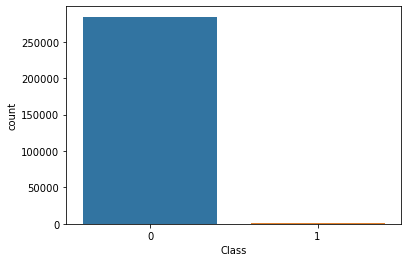

In [9]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations

sns.countplot(x='Class', data=df)
plt.show()

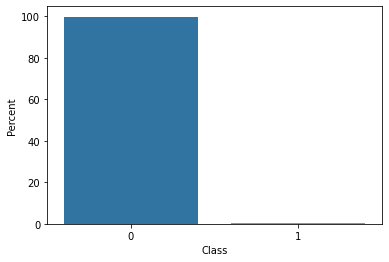

In [10]:
# Create a bar plot for the percentage of fraudulent vs non-fraudulent transcations

ax = sns.barplot(x='Class', y='Class', data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(xlabel="Class")
ax.set(ylabel="Percent")
plt.show()

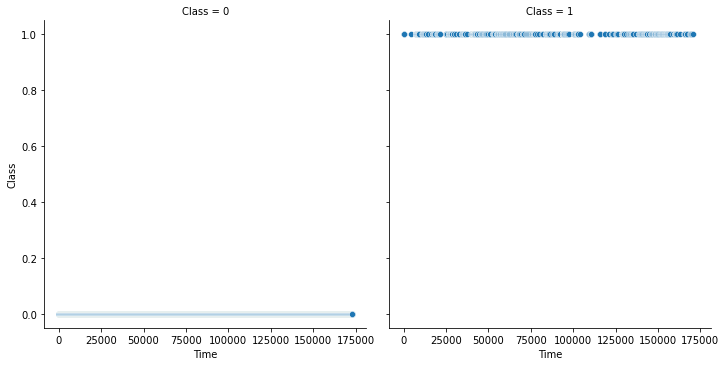

In [11]:
# Create a scatter plot to observe the distribution of classes with time

sns.relplot(x='Time', y='Class', data=df, col='Class', kind='scatter')
plt.show()

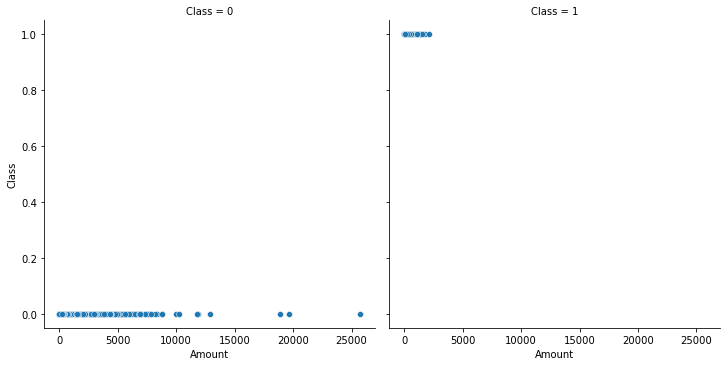

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.relplot(x='Amount', y='Class', data=df, col='Class', kind='scatter')
plt.show()

In [13]:
# Drop unnecessary columns

df.drop('Time', axis=1, inplace=True)

### Splitting the data into train & test data

In [14]:
X = df.drop('Class', axis=1)
y= df['Class']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

CPU times: user 53.5 s, sys: 714 ms, total: 54.2 s
Wall time: 54.2 s


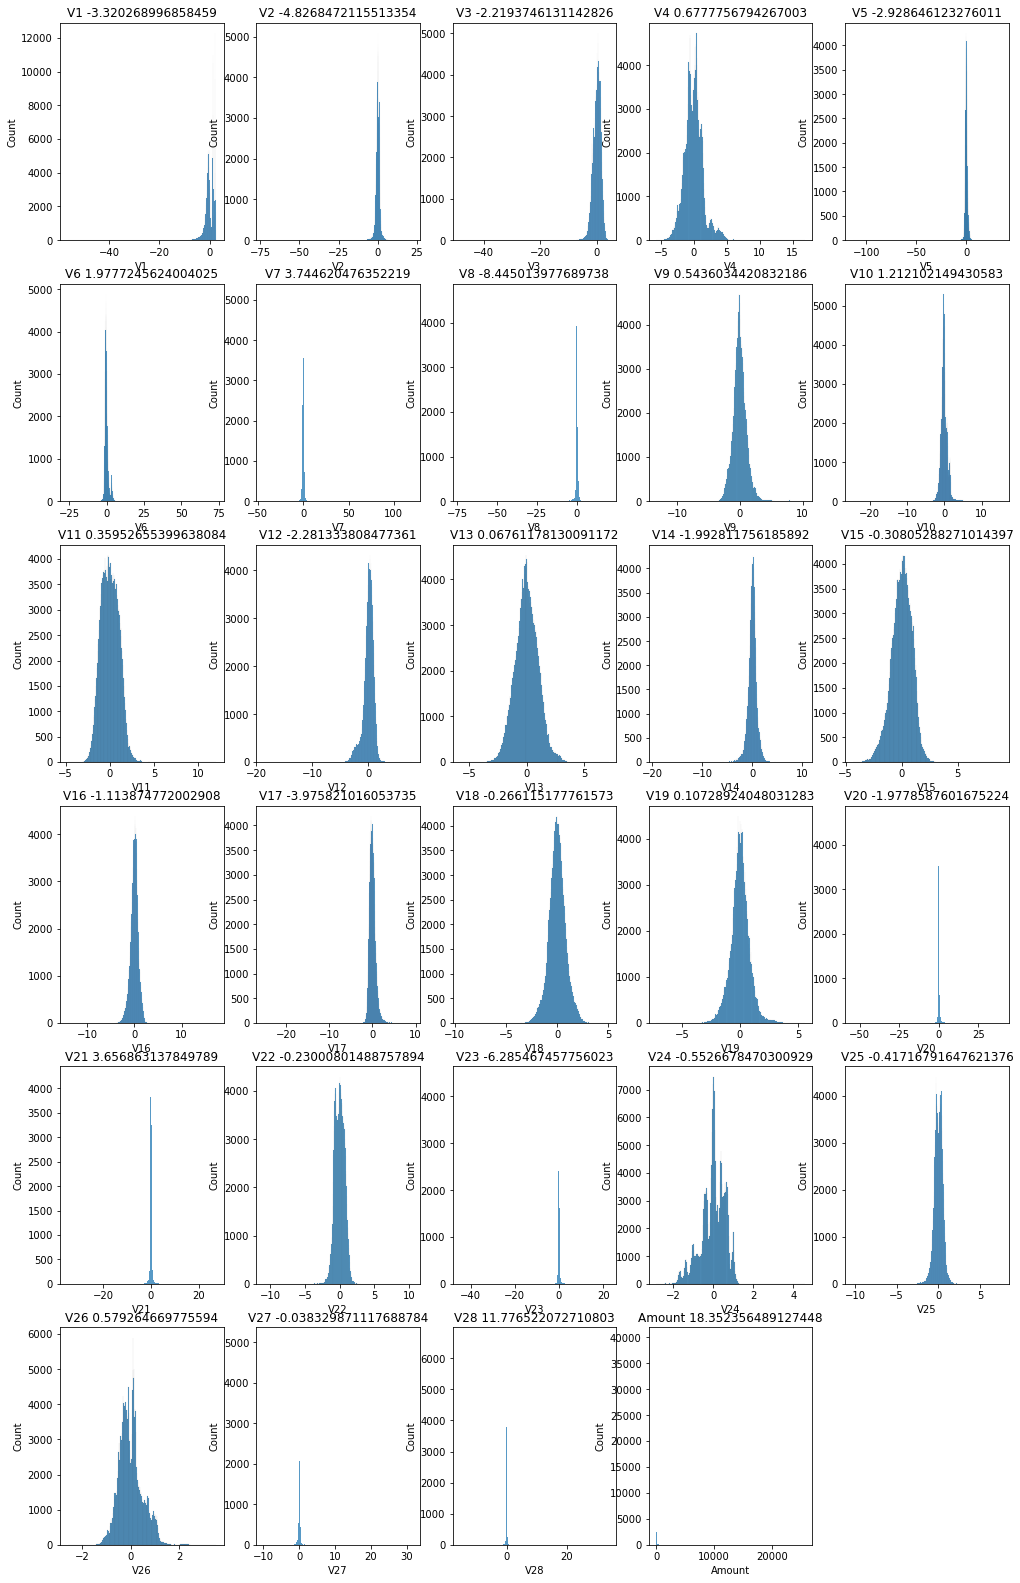

In [18]:
%%time

k=0
plt.figure(figsize=(17,28))
for col in cols:    
    k=k+1
    plt.subplot(6,5,k)    
    sns.histplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [20]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

CPU times: user 45.5 s, sys: 644 ms, total: 46.2 s
Wall time: 46.2 s


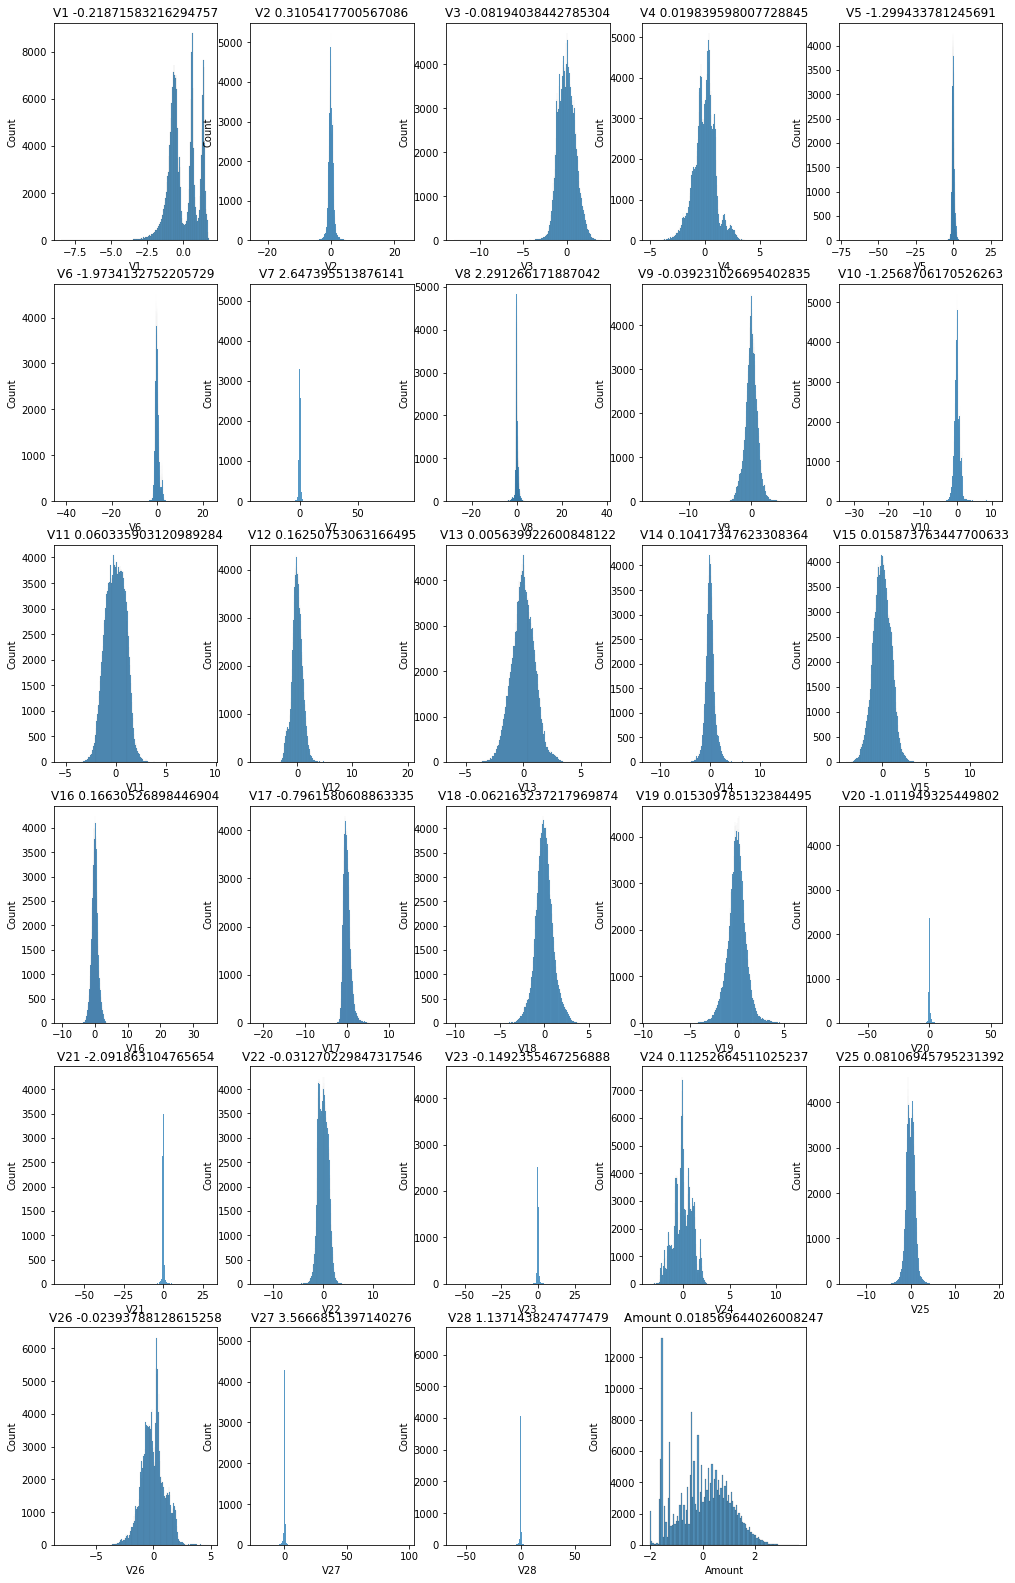

In [21]:
%%time

# plot the histogram of a variable from the dataset again to see the result

k=0
plt.figure(figsize=(17,28))
for col in cols:    
    k=k+1
    plt.subplot(6,5,k)    
    sns.histplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

X_train['Amount'].head()

223361   -0.427174
165061    0.452605
238186   -0.322827
150562    0.984757
138452    0.119243
Name: Amount, dtype: float64

In [25]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test['Amount'].head()

43428     1.602194
49906     1.790705
29474     0.226409
276481   -1.386644
278846   -1.575240
Name: Amount, dtype: float64

## Model Building
- Build different models on the imbalanced dataset and see the result

In [26]:
#Dataframe foDataFrameing results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling_Method','Model','Accuracy','roc_score', 'Threshold','Time Taken'])

In [27]:
# ROC Curve function

def draw_roc( actual, probs ):
    print("ROC-AUC")
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,
                                             drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [28]:
# For modelling
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#For Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# For Cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [29]:
def LogisticModelwithl1(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    C = [0.01, 0.1, 1, 10, 100, 1000]
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    
    logregl1 = LogisticRegressionCV(Cs=C, cv=cv, penalty='l1', scoring='roc_auc',
                                  max_iter=1000, solver='liblinear', random_state=42)
    
    logregl1.fit(X_train, y_train)
    y_test_pred = logregl1.predict(X_test)
    y_test_pred_proba = logregl1.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'Logistic Regression with l1 Penalty',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

In [30]:
def LogisticModelwithl2(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    C = [0.01, 0.1, 1, 10, 100, 1000]
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    
    logregl2 = LogisticRegressionCV(Cs=C, cv=cv, penalty='l2', scoring='roc_auc',
                                  max_iter=1000, random_state=42)
    
    logregl2.fit(X_train, y_train)
    y_test_pred = logregl2.predict(X_test)
    y_test_pred_proba = logregl2.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'Logistic Regression with l2 Penalty',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

### Decision Tree

In [31]:
def DTModelwithgini(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
    
    dt_gini.fit(X_train, y_train)
    y_test_pred = dt_gini.predict(X_test)
    y_test_pred_proba = dt_gini.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'Decision Tree with Gini Criterion',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

In [32]:
def DTModelwithentropy(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
    
    dt_entropy.fit(X_train, y_train)
    y_test_pred = dt_entropy.predict(X_test)
    y_test_pred_proba = dt_entropy.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'Decision Tree with Entropy Criterion',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

### Random Forest

In [33]:
def RFModel(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    rf = RandomForestClassifier(random_state=42)
    
    rf.fit(X_train, y_train)
    y_test_pred = rf.predict(X_test)
    y_test_pred_proba = rf.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'Random Forest',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

### XGBoost

In [34]:
def XGBModel(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    xgb = XGBClassifier(random_state=42)

    xgb.fit(X_train, y_train)
    y_test_pred = xgb.predict(X_test)
    y_test_pred_proba = xgb.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'XGBoost',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

### KNN

In [35]:
def KNNModel(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    knn = KNeighborsClassifier(n_jobs=-1)
    
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    y_test_pred_proba = knn.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'KNearestNeighbour',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

### SVC

In [36]:
def SVCModel(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    svc = SVC(kernel='sigmoid', probability=True, random_state=42)
    
    svc.fit(X_train, y_train)
    y_test_pred = svc.predict(X_test)
    y_test_pred_proba = svc.predict_proba(X_test)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'Support Vector Classifier',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

### Running all models

Model 1: Logistic Regression with L1 Penalty
Confusion Matrix
[[56855     9]
 [   38    60]]
--------------------------------------------------
Accuracy: 0.9991748885221726
f1_score: 0.718562874251497
ROC-AUC Score: 0.9794572513867674
Threshold: 0.0032316430456118205
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.61      0.72        98

    accuracy                           1.00     56962
   macro avg       0.93      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


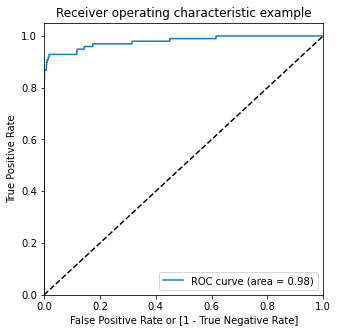

Time Taken: 138.16802167892456 Seconds
----------------------------------------------------------------------------------------------------
Model 2: Logistic Regression with L2 Penalty
Confusion Matrix
[[56855     9]
 [   41    57]]
--------------------------------------------------
Accuracy: 0.9991222218320986
f1_score: 0.6951219512195121
ROC-AUC Score: 0.980687002572554
Threshold: 0.002988517467178893
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


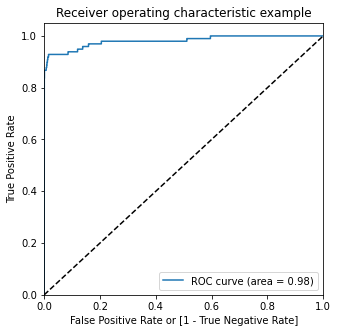

Time Taken: 27.219318628311157 Seconds
----------------------------------------------------------------------------------------------------
Model 3: Decision tree with Gini Criterion
Confusion Matrix
[[56833    31]
 [   22    76]]
--------------------------------------------------
Accuracy: 0.9990695551420246
f1_score: 0.7414634146341462
ROC-AUC Score: 0.8874825218494826
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.78      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


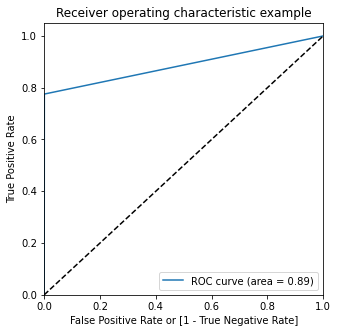

Time Taken: 16.910190105438232 Seconds
----------------------------------------------------------------------------------------------------
Model 4: Decision tree with Entropy Criterion
Confusion Matrix
[[56840    24]
 [   21    77]]
--------------------------------------------------
Accuracy: 0.9992099996488887
f1_score: 0.7738693467336683
ROC-AUC Score: 0.8926461130315941
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.79      0.77        98

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


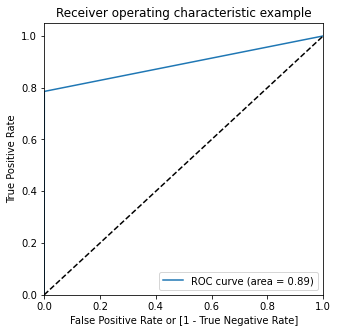

Time Taken: 10.648441314697266 Seconds
----------------------------------------------------------------------------------------------------
Model 5: Random Forest
Confusion Matrix
[[56862     2]
 [   22    76]]
--------------------------------------------------
Accuracy: 0.9995786664794073
f1_score: 0.8636363636363635
ROC-AUC Score: 0.9526089997760501
Threshold: 0.01
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


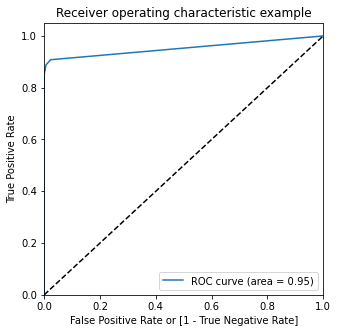

Time Taken: 185.40462446212769 Seconds
----------------------------------------------------------------------------------------------------
Model 6: XGBoost
[04:51:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[56862     2]
 [   19    79]]
--------------------------------------------------
Accuracy: 0.9996313331694814
f1_score: 0.88268156424581
ROC-AUC Score: 0.9823391723036992
Threshold: 5.405313e-05
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00

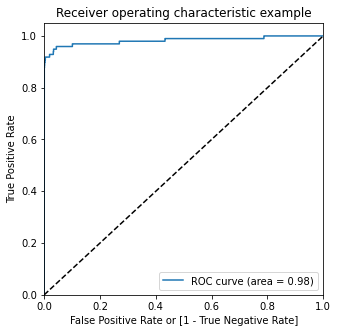

Time Taken: 29.918209552764893 Seconds
----------------------------------------------------------------------------------------------------
Model 7: KNearestNeighbour
Confusion Matrix
[[56859     5]
 [   20    78]]
--------------------------------------------------
Accuracy: 0.9995611109160493
f1_score: 0.8618784530386742
ROC-AUC Score: 0.9386512430661628
Threshold: 0.2
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


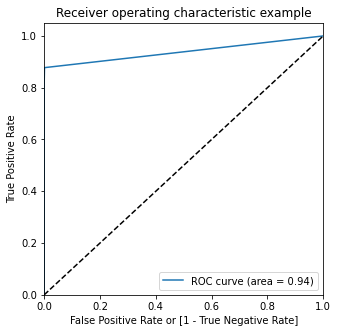

Time Taken: 569.8641335964203 Seconds
----------------------------------------------------------------------------------------------------
Model 8: Support Vector Classifier
Confusion Matrix
[[56821    43]
 [   43    55]]
--------------------------------------------------
Accuracy: 0.9984902215512096
f1_score: 0.5612244897959183
ROC-AUC Score: 0.6900223088672723
Threshold: 0.021300908248186805
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.56      0.56        98

    accuracy                           1.00     56962
   macro avg       0.78      0.78      0.78     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


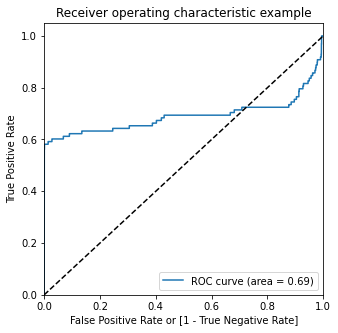

Time Taken: 80.88965249061584 Seconds
----------------------------------------------------------------------------------------------------


In [37]:
#Logistic Regression with L1
print("Model 1: Logistic Regression with L1 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl1(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Logistic Regression with L2
print("Model 2: Logistic Regression with L2 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl2(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with gini
print("Model 3: Decision tree with Gini Criterion")
start_time = time.time()
df_Results = DTModelwithgini(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with entropy
print("Model 4: Decision tree with Entropy Criterion")
start_time = time.time()
df_Results = DTModelwithentropy(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Random Forest
print("Model 5: Random Forest")
start_time = time.time()
df_Results = RFModel(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#XGB
print("Model 6: XGBoost")
start_time = time.time()
df_Results = XGBModel(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#KNN
print("Model 7: KNearestNeighbour")
start_time = time.time()
df_Results = KNNModel(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#SVC
print("Model 8: Support Vector Classifier")
start_time = time.time()
df_Results = SVCModel(df_Results, "Imbalanced Data", X_train, y_train, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)

In [38]:
df_Results.sort_values(by=['roc_score'], ascending=False, ignore_index=True)

,Data_Imbalance_Handling_Method,Model,Accuracy,roc_score,Threshold,Time Taken
0,Imbalanced Data,XGBoost,0.999631,0.982339,0.000054,29.92
1,Imbalanced Data,Logistic Regression with l2 Penalty,0.999122,0.980687,0.002989,27.22
2,Imbalanced Data,Logistic Regression with l1 Penalty,0.999175,0.979457,0.003232,138.17
3,Imbalanced Data,Random Forest,0.999579,0.952609,0.010000,185.40
4,Imbalanced Data,KNearestNeighbour,0.999561,0.938651,0.200000,569.86
5,Imbalanced Data,Decision Tree with Entropy Criterion,0.999210,0.892646,1.000000,10.65
6,Imbalanced Data,Decision Tree with Gini Criterion,0.999070,0.887483,1.000000,16.91
7,Imbalanced Data,Support Vector Classifier,0.998490,0.690022,0.021301,80.89


### Compare Model Performance

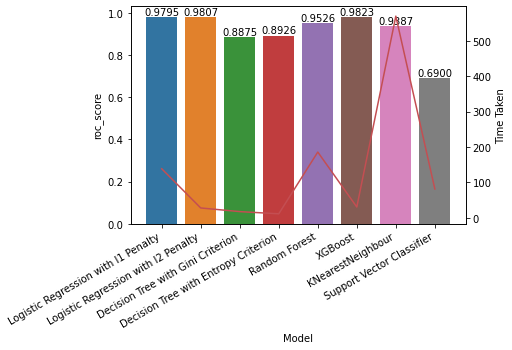

In [39]:
fig,ax = plt.subplots()
sns.barplot(x='Model', y='roc_score', data=df_Results, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Model', y='Time Taken', data=df_Results, ax=ax2, color='r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.set(rc={"figure.figsize":(20, 10)})
for p in ax.patches:
             ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
ax.grid(False)
ax2.grid(False)
plt.show()

- XGBoost Classifier gave the highest ROC AUC Score of 0.98, also it performed comparatively faster compared to other models.

- KNearestNeighbour and SVC took the most time to run. Also, its performance is not good compared to other models. We will skip these models for further analysis.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [40]:
xgb = XGBClassifier(booster='gblinear',random_state=42)

xgb.fit(X_train, y_train)
y_test_pred = xgb.predict(X_test)
y_test_pred_proba = xgb.predict_proba(X_test)[:,1]

[05:03:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
xgb_coeffs = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb.coef_))],axis=1)
xgb_coeffs.columns = ['Feature', 'Importance']
xgb_coeffs

,Feature,Importance
0,V1,-0.128830
1,V2,-0.256355
2,V3,-0.340900
3,V4,0.845028
4,V5,-0.049338
5,V6,0.136337
6,V7,-0.247037
7,V8,-0.231843
8,V9,-0.182004
9,V10,-0.084863


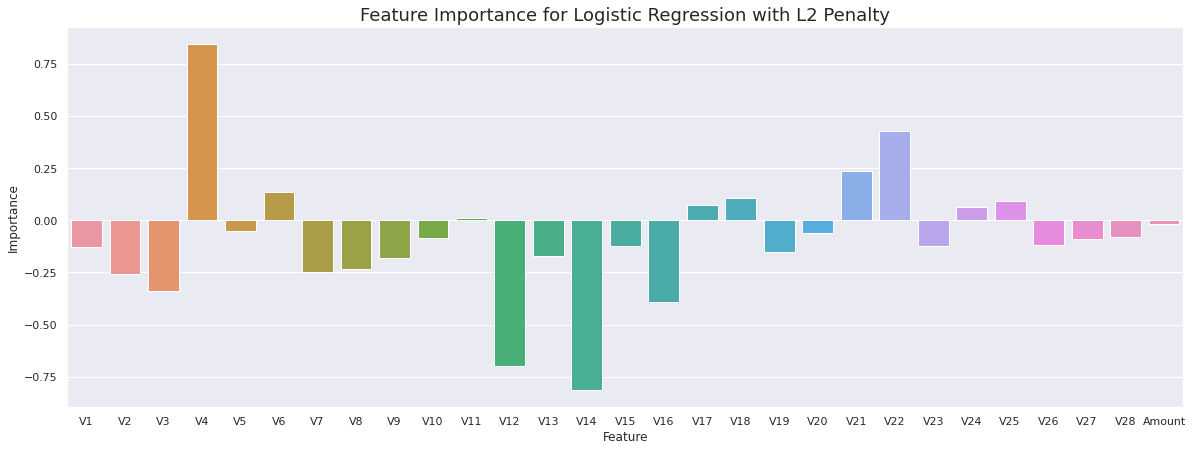

In [42]:
plt.figure(figsize=(20,7))
sns.barplot(x='Feature', y='Importance', data=xgb_coeffs)
plt.title("Feature Importance for Logistic Regression with L2 Penalty", fontsize=18)
plt.show()

In [43]:
xgb_coeffs['absolute'] = abs(xgb_coeffs['Importance'])

feature_imp = xgb_coeffs.sort_values(by='absolute', ascending=False)[:3]
feature_imp.drop('absolute', axis=1).reset_index(drop=True)

,Feature,Importance
0,V4,0.845028
1,V14,-0.813506
2,V12,-0.699655


##### Top 3 Important Features are V4, V14 & V12.



## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### 1. Random Oversampling

!pip install imblearn

In [44]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [45]:
rand_oversampler = RandomOverSampler()
X_train_oversample, y_train_oversample = rand_oversampler.fit_resample(X_train, y_train)

In [46]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_oversample))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### XGBoost Classifier

In [47]:
def XGBModel(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    start_time = time.time()
    xgb = XGBClassifier(random_state=42)

    xgb.fit(X_train, y_train)
    y_test_pred = xgb.predict(X_test.values)
    y_test_pred_proba = xgb.predict_proba(X_test.values)[:,1]
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix")
    print(cnf_matrix)

    print("-"*50)
    
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    print("f1_score:",metrics.f1_score(y_test, y_test_pred))
    roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("ROC-AUC Score:",roc_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold:", threshold)

    print("-"*50)

    print("Classification Report")
    print(classification_report(y_test, y_test_pred))

    print("-"*50)

    draw_roc(y_test, y_test_pred_proba)
    
    elapsed_time = time.time()-start_time
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Method': DataImbalance,
                                                 'Model': 'XGBoost',
                                                 'Accuracy': accuracy,
                                                 'roc_score': roc_score,
                                                 'Threshold': threshold,
                                                 'Time Taken': round(elapsed_time,2)}, index=[0]),ignore_index= True)
    
    return df_Results

### Running all models with oversamples data

Model 9: Logistic Regression with L1 Penalty
Confusion Matrix
[[55333  1531]
 [    8    90]]
--------------------------------------------------
Accuracy: 0.9729819879919946
f1_score: 0.10471204188481675
ROC-AUC Score: 0.9806494981222653
Threshold: 0.5734599965658206
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

--------------------------------------------------
ROC-AUC


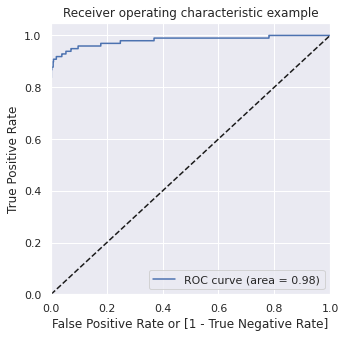

Time Taken: 315.248419046402 Seconds
----------------------------------------------------------------------------------------------------
Model 10: Logistic Regression with L2 Penalty
Confusion Matrix
[[55319  1545]
 [    8    90]]
--------------------------------------------------
Accuracy: 0.9727362101049822
f1_score: 0.103866128101558
ROC-AUC Score: 0.9805459571279271
Threshold: 0.5813763497958616
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

--------------------------------------------------
ROC-AUC


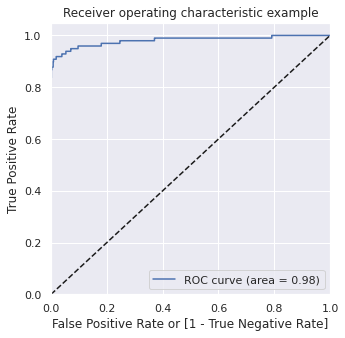

Time Taken: 48.142457485198975 Seconds
----------------------------------------------------------------------------------------------------
Model 11: Decision tree with Gini Criterion
Confusion Matrix
[[56841    23]
 [   27    71]]
--------------------------------------------------
Accuracy: 0.9991222218320986
f1_score: 0.7395833333333335
ROC-AUC Score: 0.8620426610430328
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.72      0.74        98

    accuracy                           1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


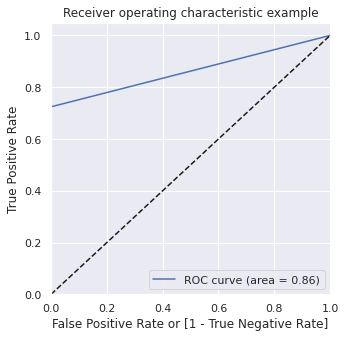

Time Taken: 13.304614067077637 Seconds
----------------------------------------------------------------------------------------------------
Model 12: Decision tree with Entropy Criterion
Confusion Matrix
[[56842    22]
 [   29    69]]
--------------------------------------------------
Accuracy: 0.9991046662687406
f1_score: 0.7301587301587302
ROC-AUC Score: 0.8518473723197777
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.70      0.73        98

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


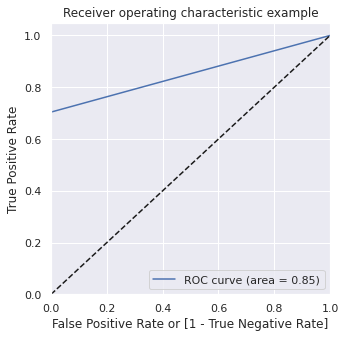

Time Taken: 9.028013944625854 Seconds
----------------------------------------------------------------------------------------------------
Model 13: Random Forest
Confusion Matrix
[[56861     3]
 [   21    77]]
--------------------------------------------------
Accuracy: 0.9995786664794073
f1_score: 0.8651685393258427
ROC-AUC Score: 0.962731971305686
Threshold: 0.01
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


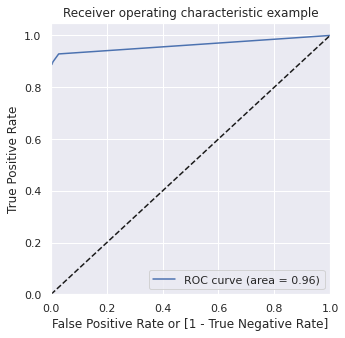

Time Taken: 141.50148344039917 Seconds
----------------------------------------------------------------------------------------------------
Model 14: XGBoost
[05:11:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[56860     4]
 [   17    81]]
--------------------------------------------------
Accuracy: 0.9996313331694814
f1_score: 0.8852459016393441
ROC-AUC Score: 0.9838332491128134
Threshold: 0.00050795823
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      

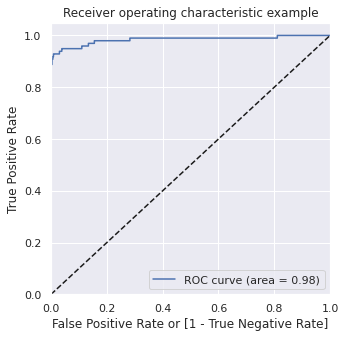

Time Taken: 42.510274171829224 Seconds
----------------------------------------------------------------------------------------------------


In [48]:
#Logistic Regression with L1
print("Model 9: Logistic Regression with L1 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl1(df_Results, "Oversampling", X_train_oversample, y_train_oversample, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Logistic Regression with L2
print("Model 10: Logistic Regression with L2 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl2(df_Results, "Oversampling", X_train_oversample, y_train_oversample, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with gini
print("Model 11: Decision tree with Gini Criterion")
start_time = time.time()
df_Results = DTModelwithgini(df_Results, "Oversampling", X_train_oversample, y_train_oversample, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with entropy
print("Model 12: Decision tree with Entropy Criterion")
start_time = time.time()
df_Results = DTModelwithentropy(df_Results, "Oversampling", X_train_oversample, y_train_oversample, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Random Forest
print("Model 13: Random Forest")
start_time = time.time()
df_Results = RFModel(df_Results, "Oversampling", X_train_oversample, y_train_oversample, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#XGB
print("Model 14: XGBoost")
start_time = time.time()
df_Results = XGBModel(df_Results, "Oversampling", X_train_oversample, y_train_oversample, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)

In [49]:
df_Results.sort_values(by=['roc_score'], ascending=False, ignore_index=True)

,Data_Imbalance_Handling_Method,Model,Accuracy,roc_score,Threshold,Time Taken
0,Oversampling,XGBoost,0.999631,0.983833,0.000508,42.51
1,Imbalanced Data,XGBoost,0.999631,0.982339,0.000054,29.92
2,Imbalanced Data,Logistic Regression with l2 Penalty,0.999122,0.980687,0.002989,27.22
3,Oversampling,Logistic Regression with l1 Penalty,0.972982,0.980649,0.573460,315.25
4,Oversampling,Logistic Regression with l2 Penalty,0.972736,0.980546,0.581376,48.14
5,Imbalanced Data,Logistic Regression with l1 Penalty,0.999175,0.979457,0.003232,138.17
6,Oversampling,Random Forest,0.999579,0.962732,0.010000,141.50
7,Imbalanced Data,Random Forest,0.999579,0.952609,0.010000,185.40
8,Imbalanced Data,KNearestNeighbour,0.999561,0.938651,0.200000,569.86
9,Imbalanced Data,Decision Tree with Entropy Criterion,0.999210,0.892646,1.000000,10.65


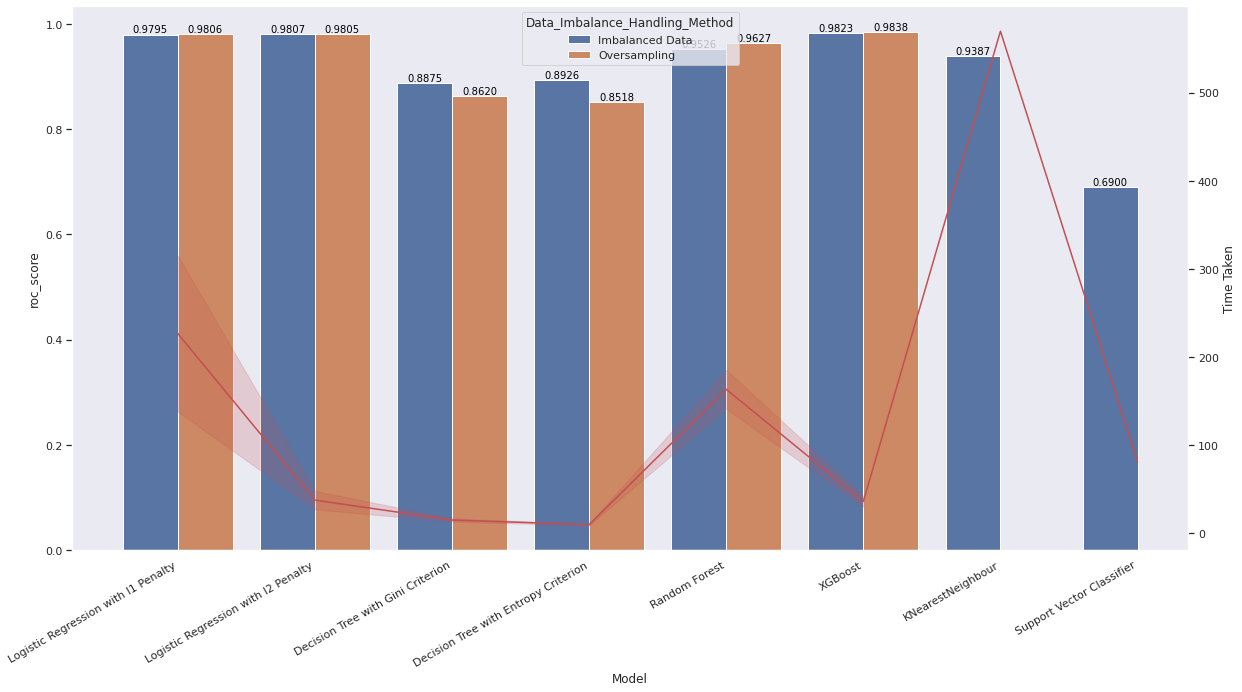

In [50]:
fig,ax = plt.subplots()
sns.barplot(x='Model', y='roc_score', hue='Data_Imbalance_Handling_Method', data=df_Results, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Model', y='Time Taken', data=df_Results, ax=ax2, color='r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.set(rc={"figure.figsize":(20, 10)})
for p in ax.patches:
             ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
ax.grid(False)
ax2.grid(False)
plt.show()

### 2. SMOTE

In [51]:
from imblearn.over_sampling import SMOTE #- import the packages
from collections import Counter

### Print the class distribution after applying SMOTE 

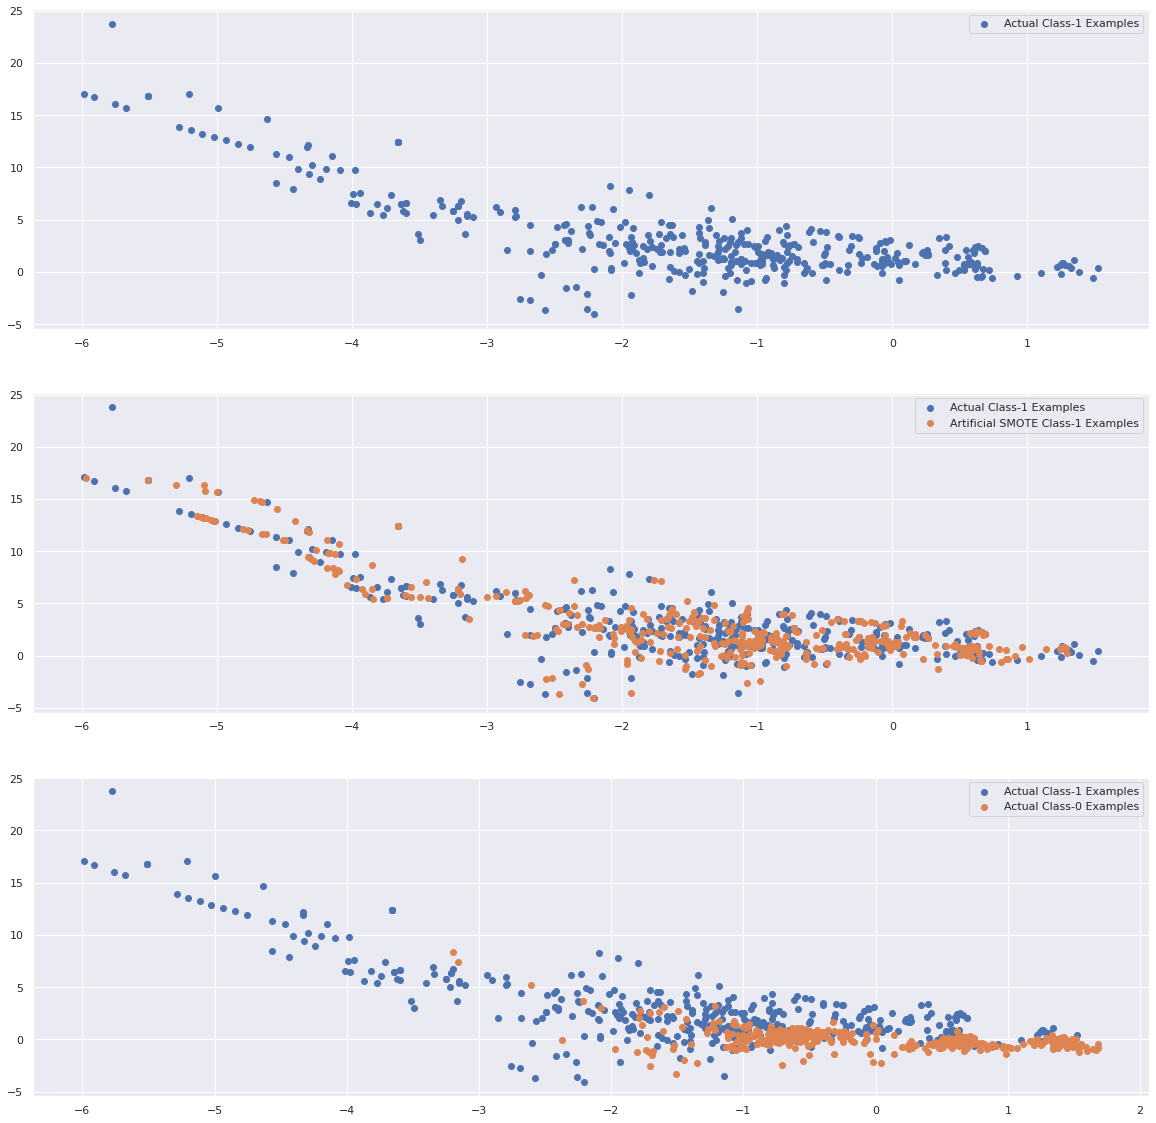

In [52]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [53]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_smote))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### Running all models

Model 15: Logistic Regression with L1 Penalty
Confusion Matrix
[[55174  1690]
 [    7    91]]
--------------------------------------------------
Accuracy: 0.9702082089814262
f1_score: 0.09686003193187866
ROC-AUC Score: 0.9802353341449129
Threshold: 0.7566580848121012
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

--------------------------------------------------
ROC-AUC


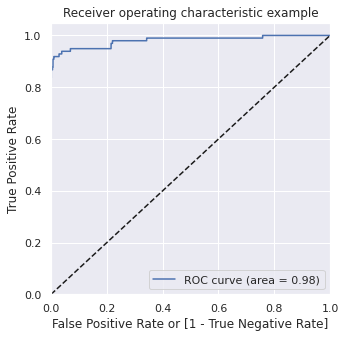

Time Taken: 316.7226746082306 Seconds
----------------------------------------------------------------------------------------------------
Model 16: Logistic Regression with L2 Penalty
Confusion Matrix
[[55156  1708]
 [    7    91]]
--------------------------------------------------
Accuracy: 0.9698922088409817
f1_score: 0.09594095940959409
ROC-AUC Score: 0.9801017357562045
Threshold: 0.7631015461468079
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

--------------------------------------------------
ROC-AUC


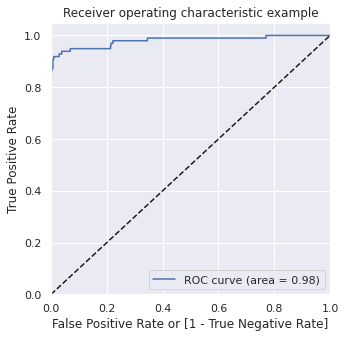

Time Taken: 44.70754289627075 Seconds
----------------------------------------------------------------------------------------------------
Model 17: Decision tree with Gini Criterion
Confusion Matrix
[[56745   119]
 [   21    77]]
--------------------------------------------------
Accuracy: 0.997542221129876
f1_score: 0.5238095238095237
ROC-AUC Score: 0.8918107866387972
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.79      0.52        98

    accuracy                           1.00     56962
   macro avg       0.70      0.89      0.76     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


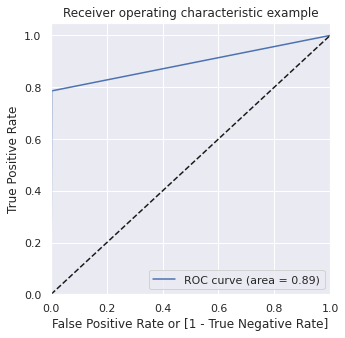

Time Taken: 38.871259927749634 Seconds
----------------------------------------------------------------------------------------------------
Model 18: Decision tree with Entropy Criterion
Confusion Matrix
[[56787    77]
 [   19    79]]
--------------------------------------------------
Accuracy: 0.9983146659176293
f1_score: 0.6220472440944881
ROC-AUC Score: 0.9023841704661607
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.81      0.62        98

    accuracy                           1.00     56962
   macro avg       0.75      0.90      0.81     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


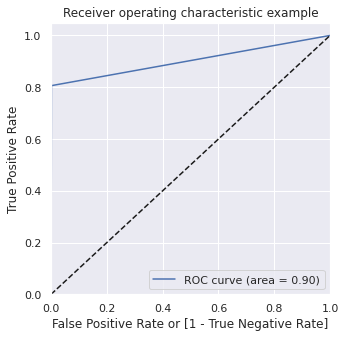

Time Taken: 24.885871410369873 Seconds
----------------------------------------------------------------------------------------------------
Model 19: Random Forest
Confusion Matrix
[[56855     9]
 [   16    82]]
--------------------------------------------------
Accuracy: 0.9995611109160493
f1_score: 0.8677248677248677
ROC-AUC Score: 0.9906185937374388
Threshold: 0.04
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


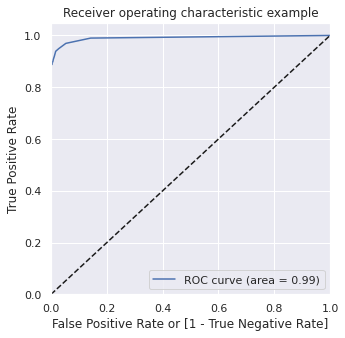

Time Taken: 308.1500680446625 Seconds
----------------------------------------------------------------------------------------------------
Model 20: XGBoost
[05:24:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[56837    27]
 [   12    86]]
--------------------------------------------------
Accuracy: 0.9993153330290369
f1_score: 0.8151658767772512
ROC-AUC Score: 0.9846622948560404
Threshold: 0.0039266692
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.88      0.94      0.91     56962
weighted avg       1.00      1.

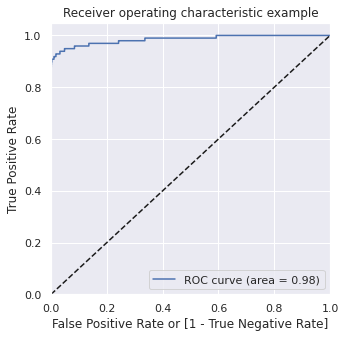

Time Taken: 73.10746765136719 Seconds
----------------------------------------------------------------------------------------------------


In [54]:
#Logistic Regression with L1
print("Model 15: Logistic Regression with L1 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl1(df_Results, "SMOTE", X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Logistic Regression with L2
print("Model 16: Logistic Regression with L2 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl2(df_Results, "SMOTE", X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with gini
print("Model 17: Decision tree with Gini Criterion")
start_time = time.time()
df_Results = DTModelwithgini(df_Results, "SMOTE", X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with entropy
print("Model 18: Decision tree with Entropy Criterion")
start_time = time.time()
df_Results = DTModelwithentropy(df_Results, "SMOTE", X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Random Forest
print("Model 19: Random Forest")
start_time = time.time()
df_Results = RFModel(df_Results, "SMOTE", X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#XGB
print("Model 20: XGBoost")
start_time = time.time()
df_Results = XGBModel(df_Results, "SMOTE", X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)

In [55]:
df_Results.sort_values(by=['roc_score'], ascending=False, ignore_index=True)

,Data_Imbalance_Handling_Method,Model,Accuracy,roc_score,Threshold,Time Taken
0,SMOTE,Random Forest,0.999561,0.990619,0.040000,308.15
1,SMOTE,XGBoost,0.999315,0.984662,0.003927,73.11
2,Oversampling,XGBoost,0.999631,0.983833,0.000508,42.51
3,Imbalanced Data,XGBoost,0.999631,0.982339,0.000054,29.92
4,Imbalanced Data,Logistic Regression with l2 Penalty,0.999122,0.980687,0.002989,27.22
5,Oversampling,Logistic Regression with l1 Penalty,0.972982,0.980649,0.573460,315.25
6,Oversampling,Logistic Regression with l2 Penalty,0.972736,0.980546,0.581376,48.14
7,SMOTE,Logistic Regression with l1 Penalty,0.970208,0.980235,0.756658,316.72
8,SMOTE,Logistic Regression with l2 Penalty,0.969892,0.980102,0.763102,44.71
9,Imbalanced Data,Logistic Regression with l1 Penalty,0.999175,0.979457,0.003232,138.17


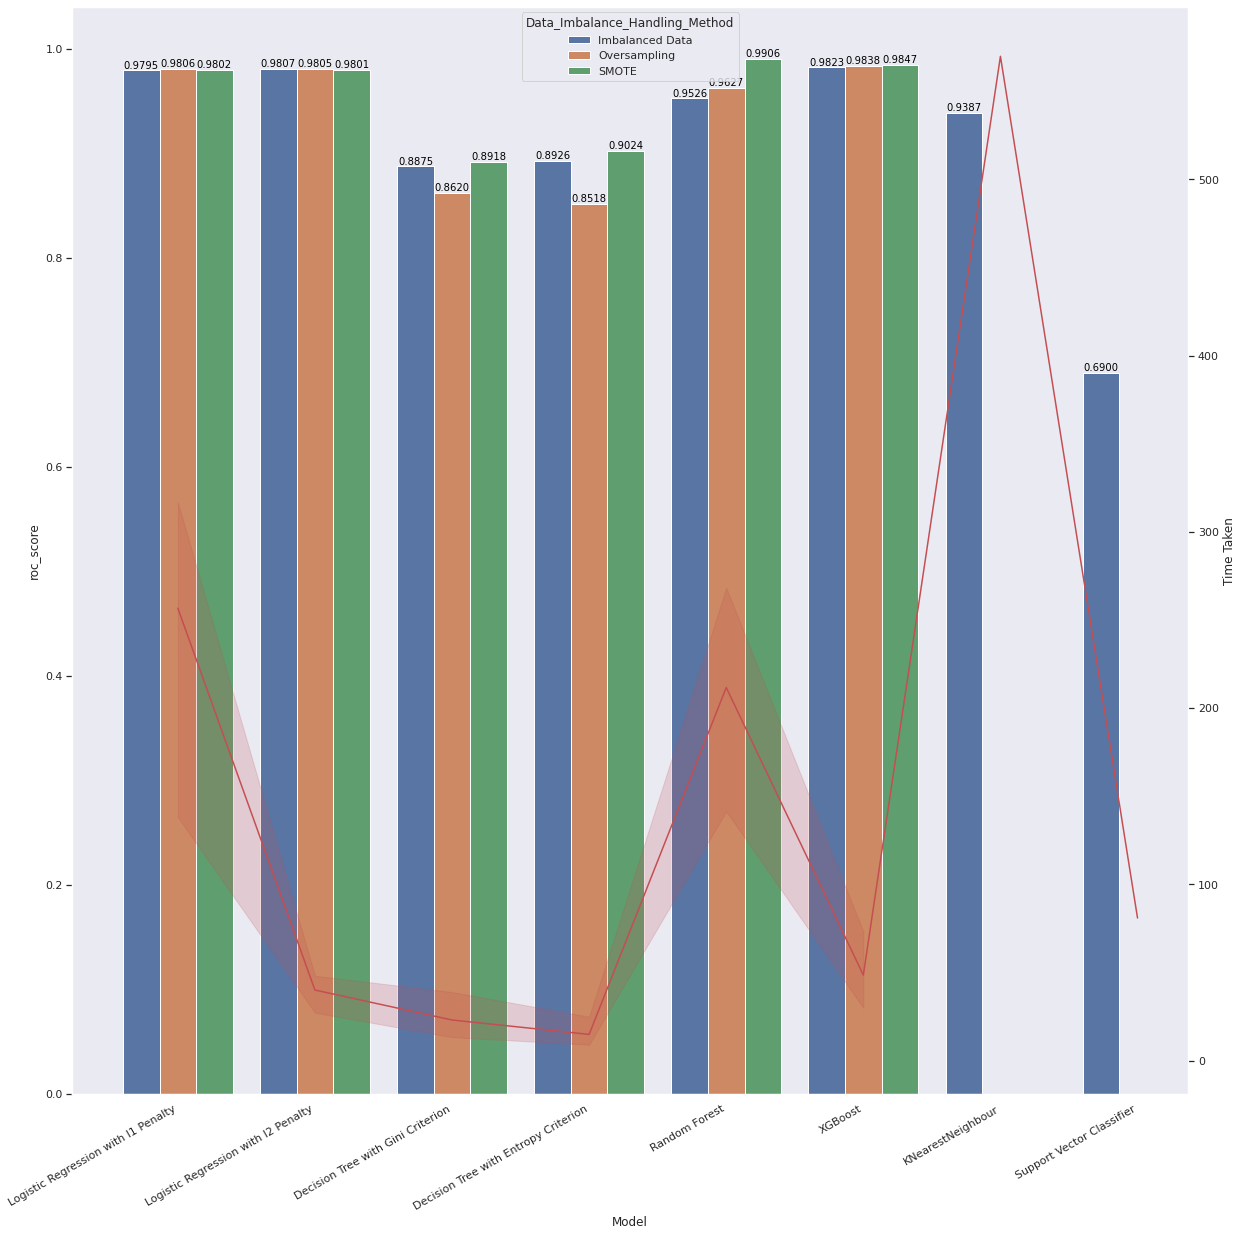

In [56]:
fig,ax = plt.subplots()
sns.barplot(x='Model', y='roc_score', hue='Data_Imbalance_Handling_Method', data=df_Results, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Model', y='Time Taken', data=df_Results, ax=ax2, color='r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.set(rc={"figure.figsize":(20, 10)})
for p in ax.patches:
             ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
ax.grid(False)
ax2.grid(False)
plt.show()

### 3. ADASYN

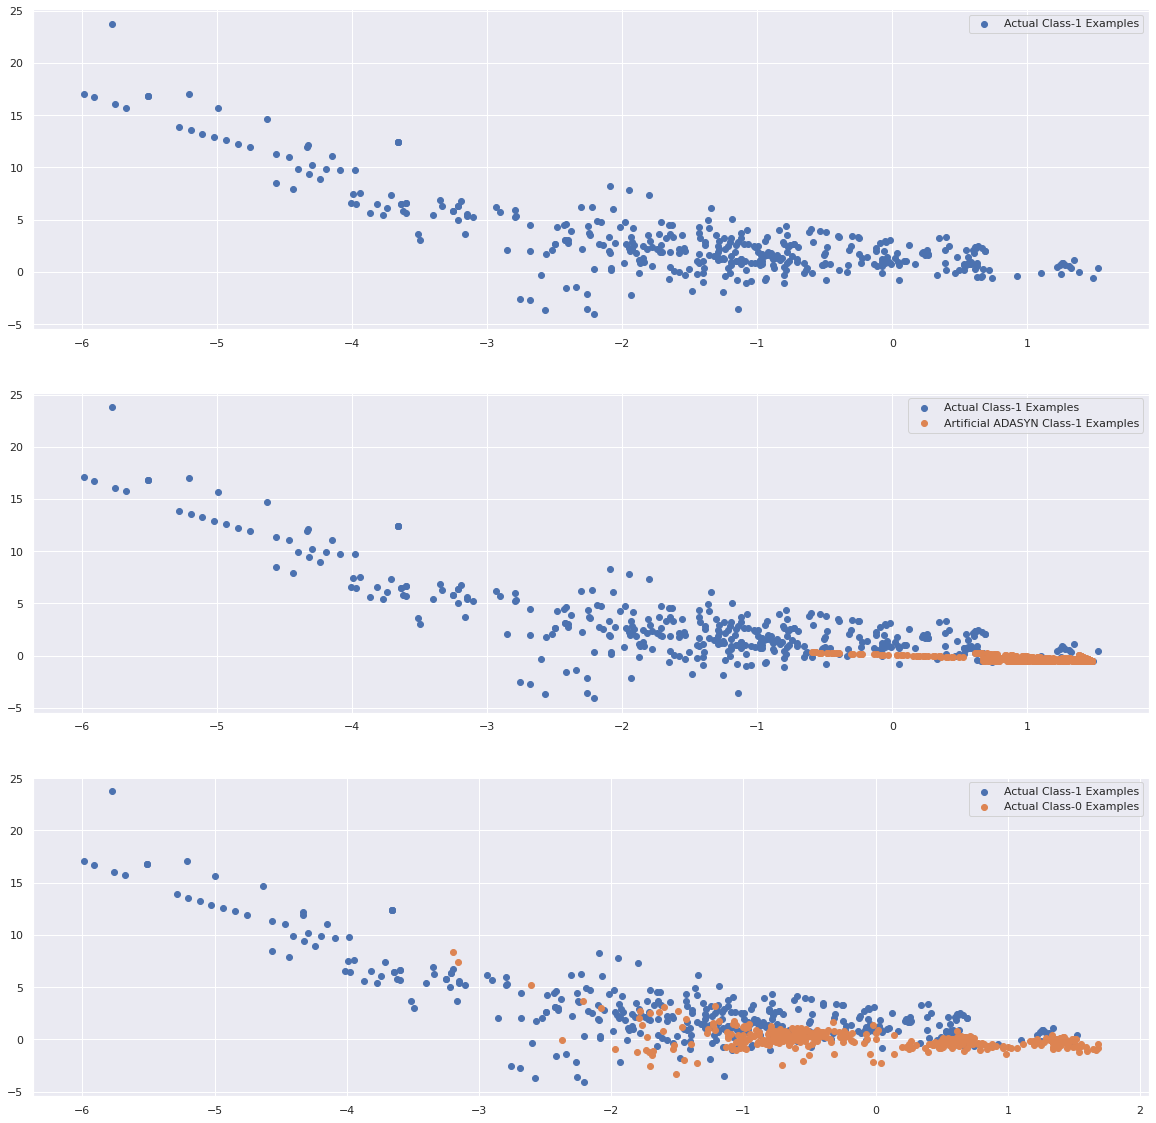

In [57]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [58]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227394})


### Running all models

Model 21: Logistic Regression with L1 Penalty
Confusion Matrix
[[51598  5266]
 [    5    93]]
--------------------------------------------------
Accuracy: 0.9074646255398335
f1_score: 0.03408466190214403
ROC-AUC Score: 0.9788989913635684
Threshold: 0.9670063025762946
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

--------------------------------------------------
ROC-AUC


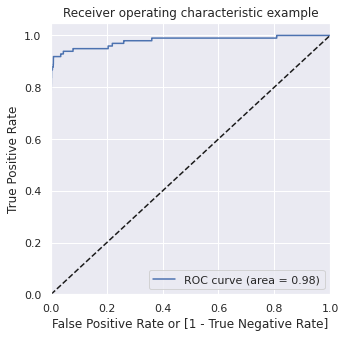

Time Taken: 540.4933319091797 Seconds
----------------------------------------------------------------------------------------------------
Model 22: Logistic Regression with L2 Penalty
Confusion Matrix
[[51601  5263]
 [    5    93]]
--------------------------------------------------
Accuracy: 0.9075172922299076
f1_score: 0.034103410341034104
ROC-AUC Score: 0.9788734201474625
Threshold: 0.9669616769191073
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

--------------------------------------------------
ROC-AUC


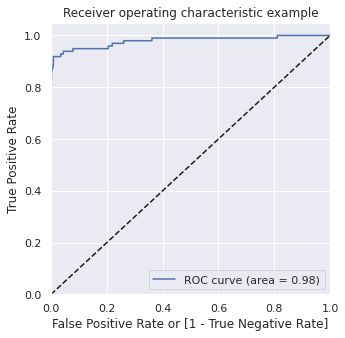

Time Taken: 41.98799777030945 Seconds
----------------------------------------------------------------------------------------------------
Model 23: Decision tree with Gini Criterion
Confusion Matrix
[[56764   100]
 [   18    80]]
--------------------------------------------------
Accuracy: 0.9979284435237527
f1_score: 0.5755395683453237
ROC-AUC Score: 0.9072839743663363
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.82      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.91      0.79     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


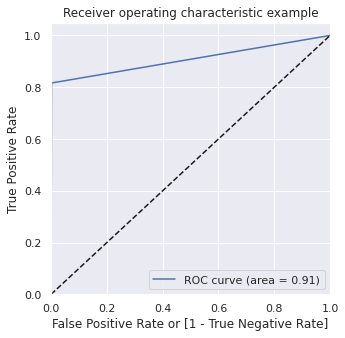

Time Taken: 38.63642764091492 Seconds
----------------------------------------------------------------------------------------------------
Model 24: Decision tree with Entropy Criterion
Confusion Matrix
[[56785    79]
 [   24    74]]
--------------------------------------------------
Accuracy: 0.9981917769741231
f1_score: 0.5896414342629482
ROC-AUC Score: 0.8768563805657321
Threshold: 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.76      0.59        98

    accuracy                           1.00     56962
   macro avg       0.74      0.88      0.79     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


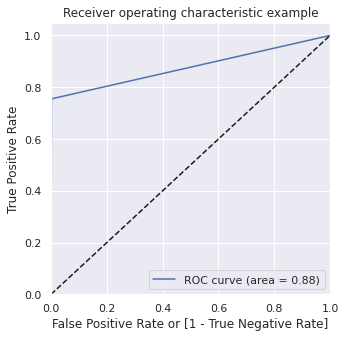

Time Taken: 28.199055433273315 Seconds
----------------------------------------------------------------------------------------------------
Model 25: Random Forest
Confusion Matrix
[[56857     7]
 [   15    83]]
--------------------------------------------------
Accuracy: 0.9996137776061234
f1_score: 0.8829787234042554
ROC-AUC Score: 0.9803979132452079
Threshold: 0.03
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


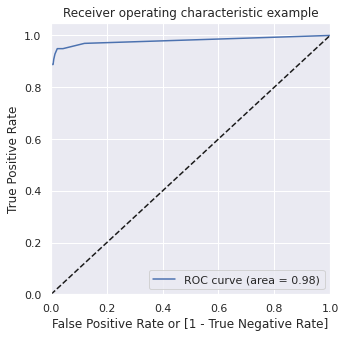

Time Taken: 343.58420848846436 Seconds
----------------------------------------------------------------------------------------------------
Model 26: XGBoost
[05:42:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[56835    29]
 [   12    86]]
--------------------------------------------------
Accuracy: 0.9992802219023208
f1_score: 0.8075117370892018
ROC-AUC Score: 0.9876683931873256
Threshold: 0.053894427
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.88      0.81        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.

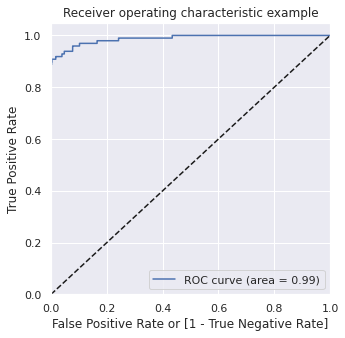

Time Taken: 72.76116704940796 Seconds
----------------------------------------------------------------------------------------------------


In [59]:
#Logistic Regression with L1
print("Model 21: Logistic Regression with L1 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl1(df_Results, "ADASYN", X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Logistic Regression with L2
print("Model 22: Logistic Regression with L2 Penalty")
start_time = time.time()
df_Results = LogisticModelwithl2(df_Results, "ADASYN", X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with gini
print("Model 23: Decision tree with Gini Criterion")
start_time = time.time()
df_Results = DTModelwithgini(df_Results, "ADASYN", X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Decision tree with entropy
print("Model 24: Decision tree with Entropy Criterion")
start_time = time.time()
df_Results = DTModelwithentropy(df_Results, "ADASYN", X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#Random Forest
print("Model 25: Random Forest")
start_time = time.time()
df_Results = RFModel(df_Results, "ADASYN", X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)
#XGB
print("Model 26: XGBoost")
start_time = time.time()
df_Results = XGBModel(df_Results, "ADASYN", X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Taken: {} Seconds".format(time.time()-start_time))
print("-"*100)

In [60]:
df_Results.sort_values(by=['roc_score'], ascending=False, ignore_index=True)

,Data_Imbalance_Handling_Method,Model,Accuracy,roc_score,Threshold,Time Taken
0,SMOTE,Random Forest,0.999561,0.990619,0.040000,308.15
1,ADASYN,XGBoost,0.999280,0.987668,0.053894,72.76
2,SMOTE,XGBoost,0.999315,0.984662,0.003927,73.11
3,Oversampling,XGBoost,0.999631,0.983833,0.000508,42.51
4,Imbalanced Data,XGBoost,0.999631,0.982339,0.000054,29.92
5,Imbalanced Data,Logistic Regression with l2 Penalty,0.999122,0.980687,0.002989,27.22
6,Oversampling,Logistic Regression with l1 Penalty,0.972982,0.980649,0.573460,315.25
7,Oversampling,Logistic Regression with l2 Penalty,0.972736,0.980546,0.581376,48.14
8,ADASYN,Random Forest,0.999614,0.980398,0.030000,343.58
9,SMOTE,Logistic Regression with l1 Penalty,0.970208,0.980235,0.756658,316.72


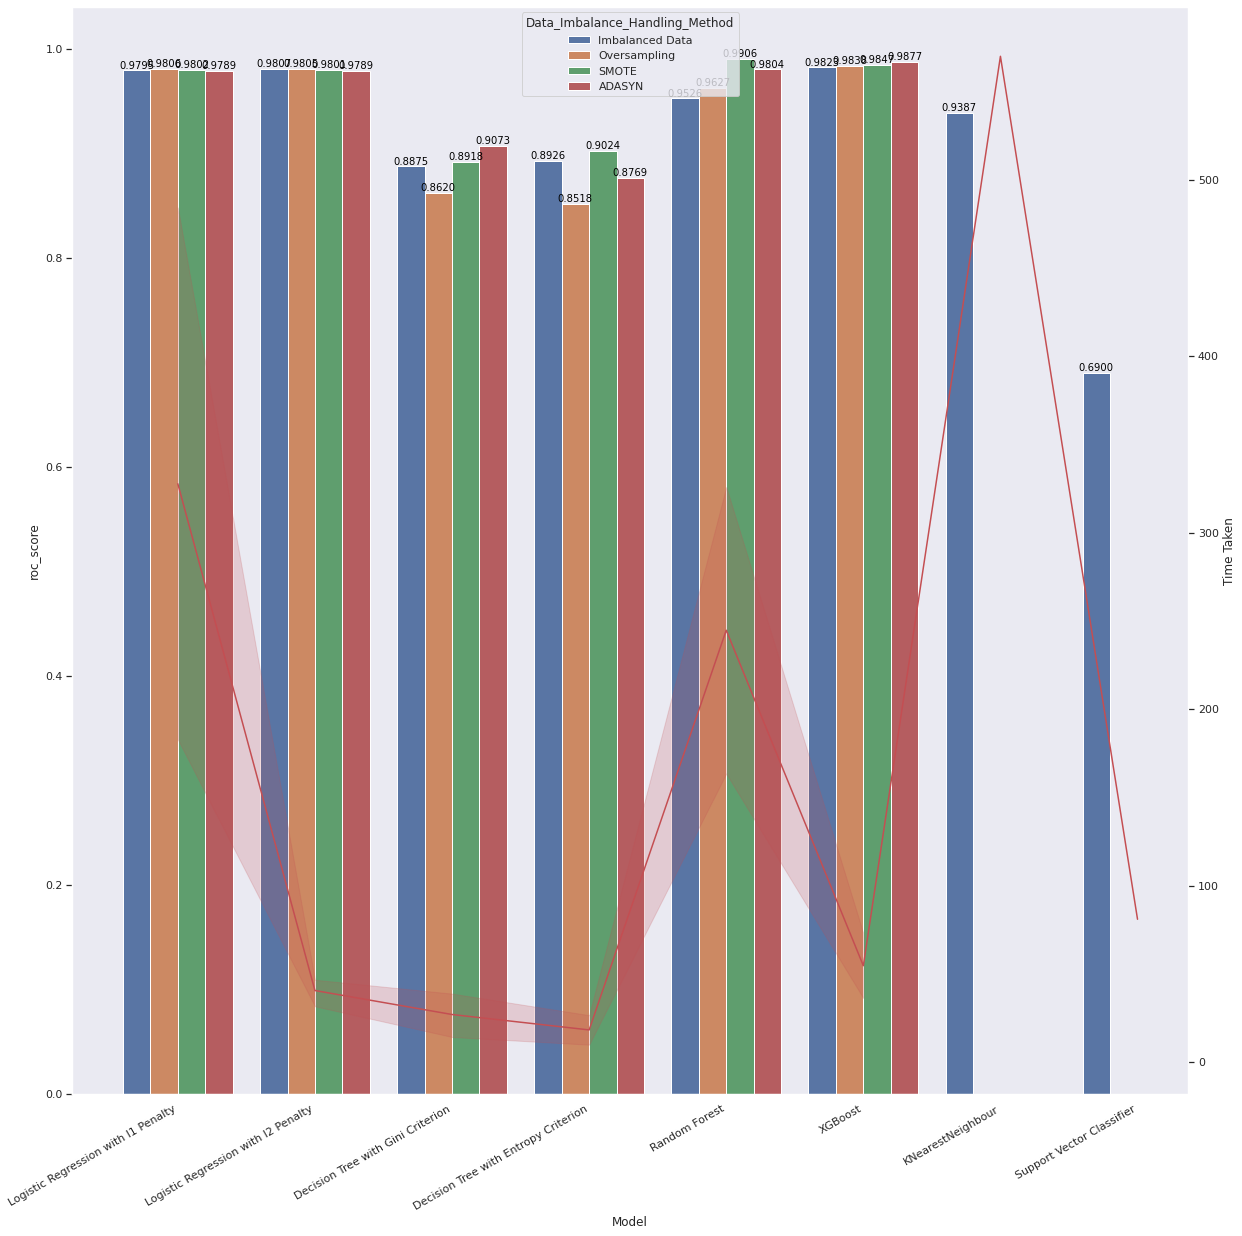

In [61]:
fig,ax = plt.subplots()
sns.barplot(x='Model', y='roc_score', hue='Data_Imbalance_Handling_Method', data=df_Results, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Model', y='Time Taken', data=df_Results, ax=ax2, color='r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.set(rc={"figure.figsize":(20, 7)})
for p in ax.patches:
             ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
ax.grid(False)
ax2.grid(False)
plt.show()

- Although Random Forest with SMOTE gave highest ROC AUC score of 0.990619, it took almost 4 times longer to run than XGBOOST.
- XGBoost Classifier with ADASYN Data Imbalance Handling Method gave the second best result of 0.987668 ROC AUC Score.
- Due to resource constraints, We will tune hyperparameters for XGBoost with ADASYN to get the best score.

### Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [62]:
start_time = time.time()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)} 

xgb_cv1 = GridSearchCV(estimator = XGBClassifier(seed=42),
                       param_grid=param_grid,
                       scoring='roc_auc',
                       cv=folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=-1)

xgb_cv1.fit(X_train_adasyn, y_train_adasyn)

print("Time taken in sec: {}".format(round(time.time()-start_time),2))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[07:07:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken in sec: 5088


In [63]:
print(xgb_cv1.best_score_)
print(xgb_cv1.best_params_)

0.9999928035507395
{'max_depth': 7, 'min_child_weight': 1}


In [64]:
start_time = time.time()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'n_estimators':range(60,150,20)}

xgb_cv2 = GridSearchCV(estimator = XGBClassifier(max_depth=7, min_child_weight=1, seed=42),
                       param_grid=param_grid,
                       scoring='roc_auc',
                       cv=folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=-1)

xgb_cv2.fit(X_train_adasyn, y_train_adasyn)

print("Time taken in sec: {}".format(round(time.time()-start_time),2))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[07:54:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken in sec: 2754


In [65]:
print(xgb_cv2.best_score_)
print(xgb_cv2.best_params_)

0.9999938007280418
{'n_estimators': 120}


In [66]:
start_time = time.time()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'learning_rate':[0.05,0.1,0.125,0.15,0.2]} 

xgb_cv3 = GridSearchCV(estimator = XGBClassifier(n_estimators=120, max_depth=7, min_child_weight=1, seed=42),
                       param_grid=param_grid,
                       scoring='roc_auc',
                       cv=folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=-1)

xgb_cv3.fit(X_train_adasyn, y_train_adasyn)

print("Time taken in sec: {}".format(round(time.time()-start_time),2))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[09:11:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken in sec: 4665


In [67]:
print(xgb_cv3.best_score_)
print(xgb_cv3.best_params_)

0.9999908337026264
{'learning_rate': 0.2}


In [68]:
start_time = time.time()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'gamma':[i/10.0 for i in range(0,5)]} 

xgb_cv4 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=120, max_depth=7, min_child_weight=1, seed=42),
                       param_grid=param_grid,
                       scoring='roc_auc',
                       cv=folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=-1)

xgb_cv4.fit(X_train_adasyn, y_train_adasyn)

print("Time taken in sec: {}".format(round(time.time()-start_time),2))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[10:29:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken in sec: 4521


In [69]:
print(xgb_cv4.best_score_)
print(xgb_cv4.best_params_)

0.9999939758503572
{'gamma': 0.1}


In [70]:
start_time = time.time()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'subsample':[i/10.0 for i in range(7,10)], 'colsample_bytree':[i/10.0 for i in range(7,10)]} 

xgb_cv5 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, gamma= 0.1, n_estimators=120, max_depth=7,
                                                 min_child_weight=1, seed=42),
                       param_grid=param_grid,
                       scoring='roc_auc',
                       cv=folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=-1)

xgb_cv5.fit(X_train_adasyn, y_train_adasyn)

print("Time taken in sec: {}".format(round(time.time()-start_time),2))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[11:53:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken in sec: 4975


In [71]:
print(xgb_cv5.best_score_)
print(xgb_cv5.best_params_)

0.9999939685032437
{'colsample_bytree': 0.7, 'subsample': 0.9}


##### Fitting balanced dataset on tuned model.

[12:00:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[56840    24]
 [   13    85]]
--------------------------------------------------
Accuracy: 0.9993504441557529
f1_score: 0.821256038647343
ROC-AUC Score: 0.9882072729204231
Threshold: 0.013225971
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.87      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
ROC-AUC


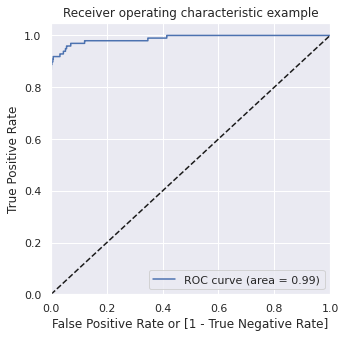

Time Taken: 80.22833800315857


In [72]:
start_time = time.time()
xgb_optimal = XGBClassifier(learning_rate=0.2, gamma= 0.1, n_estimators=120, max_depth=7,
                            subsample=0.9, colsample_bytree=0.7, min_child_weight=1, seed=42)

xgb_optimal.fit(X_train_adasyn, y_train_adasyn)
y_test_pred = xgb_optimal.predict(X_test)
y_test_pred_proba = xgb_optimal.predict_proba(X_test)[:,1]
    
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix")
print(cnf_matrix)

print("-"*50)
    
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:",accuracy)
print("f1_score:",metrics.f1_score(y_test, y_test_pred))
roc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC-AUC Score:",roc_score)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold:", threshold)

print("-"*50)

print("Classification Report")
print(classification_report(y_test, y_test_pred))

print("-"*50)

draw_roc(y_test, y_test_pred_proba)
    
elapsed_time = time.time()-start_time
print('Time Taken:',elapsed_time)

### Print the important features of the best model to understand the dataset

In [73]:
clf = xgb_optimal

Top var = 4
2nd Top var = 14
3rd Top var = 8


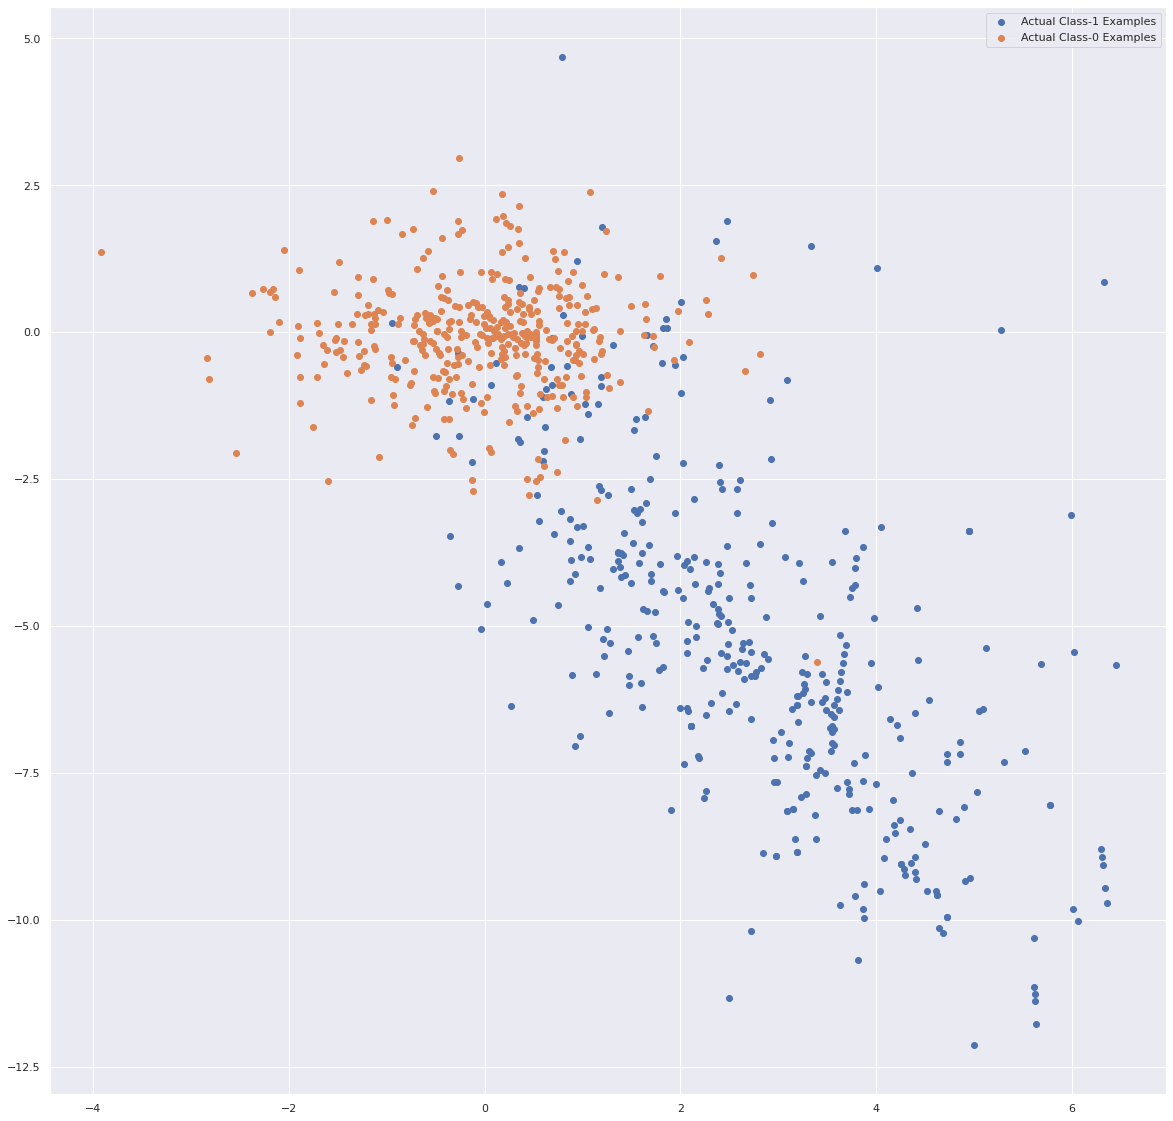

In [74]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [75]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [76]:
print('XGBoost Train auc:', metrics.roc_auc_score(y_test, y_test_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: ",threshold)

XGBoost Train auc: 0.9882072729204231
XGBoost threshold:  0.013225971


## Model Selection:
## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with ADASYN has provided best results.

**Model Accuracy: 0.9993504441557529**

**XGboost roc_value: 0.9882072729204231**

**XGBoost threshold: 0.013225971**